In [1]:
%matplotlib inline
from tqdm import tqdm,trange
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time 
from matplotlib import pyplot as plt
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.0 


In [2]:
frames = []

cap = cv2.VideoCapture('data.mj2')

for i in trange(1000):
            
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    frames.append(gray)
    

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 414.99it/s]


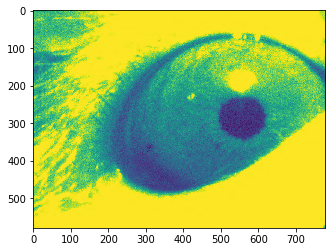

In [4]:
len(frames)
len(c)
frames[0].shape

plt.imshow(frames[0])

In [61]:
def find_pupple(raw_image,last_result):
    
    blurred_image = cv2.GaussianBlur(raw_image,(29,29),0)
  
    thresh = cv2.adaptiveThreshold(blurred_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,141,35)
    
    image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    filtered_contours = [cnt for cnt in contours if (len(cnt)<1000) and (len(cnt)>200)]

    ellipses = []
    
    for cnt in filtered_contours: 
        try: 
            ellipses.append(cv2.fitEllipse(cnt)) 
        except: 
            pass 

    loss = [] 

    for ellipse,contour in zip(ellipses,filtered_contours): 
        
        loss.append(abs((np.pi/4 * ellipse[1][0] * ellipse[1][1])-(cv2.contourArea(contour))))
        
    loss = np.asarray(loss)

    try:
        return cv2.ellipse(raw_image.copy(),ellipses[np.argmin(loss)],(255,255,255),2)
    except:
        return last_result

In [62]:
otrabotanniy = [frames[0]]

for i in trange(1000):
    otrabotanniy.append(find_pupple(frames[i],otrabotanniy[-1]))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:24<00:00, 41.57it/s]


In [63]:
otrabotanniy.remove(otrabotanniy[0])


In [25]:
cv2.adaptiveThreshold?

In [35]:
cv2.ellipse?

In [64]:
len(otrabotanniy)

1000

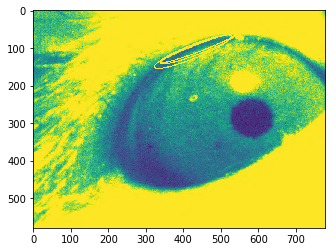

In [65]:
plt.imshow(otrabotanniy[920])

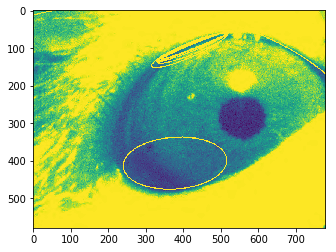

In [66]:
plt.imshow(find_pupple(frames[0],frames[0]))